In [59]:
import pandas as pd
import numpy as np

In [60]:
df_oil = pd.read_csv(
    "../data/wti-daily.csv",
    usecols=[0, 1],
    header=0,
    names=["date", "oil"],
)
df_oil["date"] = pd.to_datetime(df_oil["date"])
df_oil = df_oil.set_index("date")
df_oil.head()

,oil
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [ ]:
# ice cream data - price is per half gallon (1.9L)
df_icecream = pd.read_csv(
    "../data/ice-cream.csv", usecols=[0, 1], header=0, names=["date", "icecream"]
)
df_icecream["date"] = pd.to_datetime(df_icecream["date"])
df_icecream = df_icecream.set_index("date")
df_icecream["icecream"] = pd.to_numeric(df_icecream["icecream"], errors="coerce")
df_icecream["icecream"] = df_icecream["icecream"].dropna().astype(np.float16)
df_icecream.head()

,icecream
date,
1980-01-01,1.754883
1980-02-01,1.775391
1980-03-01,1.717773
1980-04-01,1.768555
1980-05-01,1.822266


In [62]:
df_miles = pd.read_csv(
    "../data/miles-traveled.csv", usecols=[0, 1], header=0, names=["date", "miles"]
)
df_miles["date"] = pd.to_datetime(df_miles["date"])
df_miles = df_miles.set_index("date")
df_miles.head()

,miles
date,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [63]:
df = df_oil.join(df_icecream, how="inner").join(df_miles, how="inner")
df["month"] = df.index.month
df.head()

,oil,icecream,miles,month
date,,,,
1986-04-01,11.13,2.382812,150277.0,4
1986-05-01,13.80,2.367188,160459.0,5
1986-07-01,12.39,2.369141,171114.0,7
1986-08-01,11.56,2.318359,173977.0,8
1986-10-01,15.23,2.376953,159434.0,10


In [64]:
df[["oil", "icecream", "miles"]].corr()

,oil,icecream,miles
oil,1.000000,0.777299,0.645250
icecream,0.777299,1.000000,0.818402
miles,0.645250,0.818402,1.000000


<Axes: xlabel='oil', ylabel='icecream'>

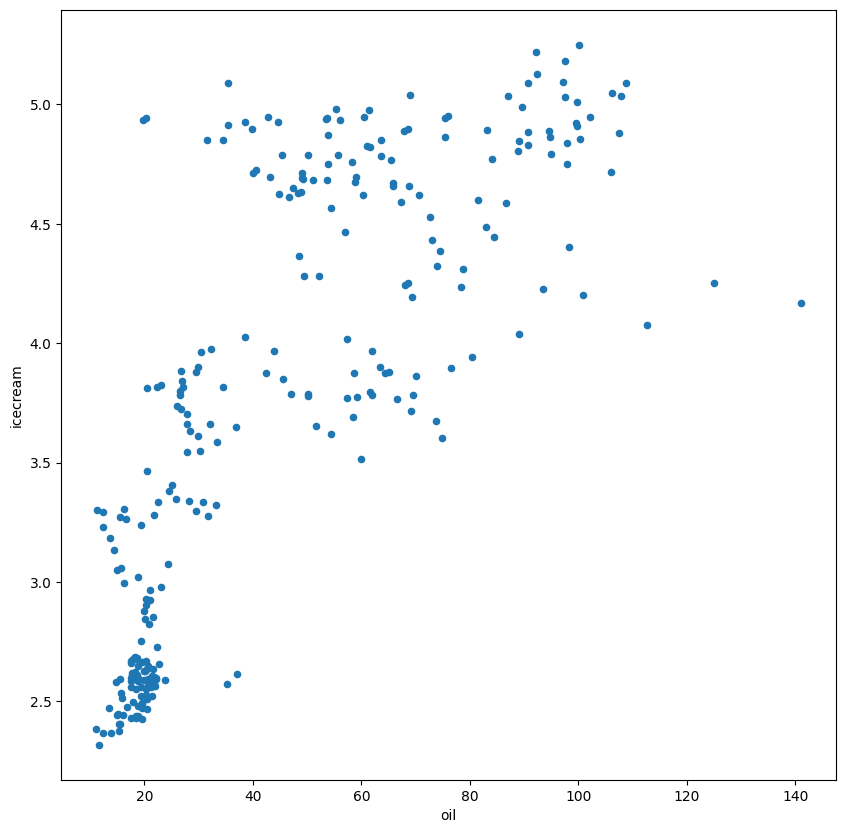

In [ ]:
df.plot(kind="scatter", x="oil", y="icecream", figsize=(10, 10))

<Axes: xlabel='oil', ylabel='miles'>

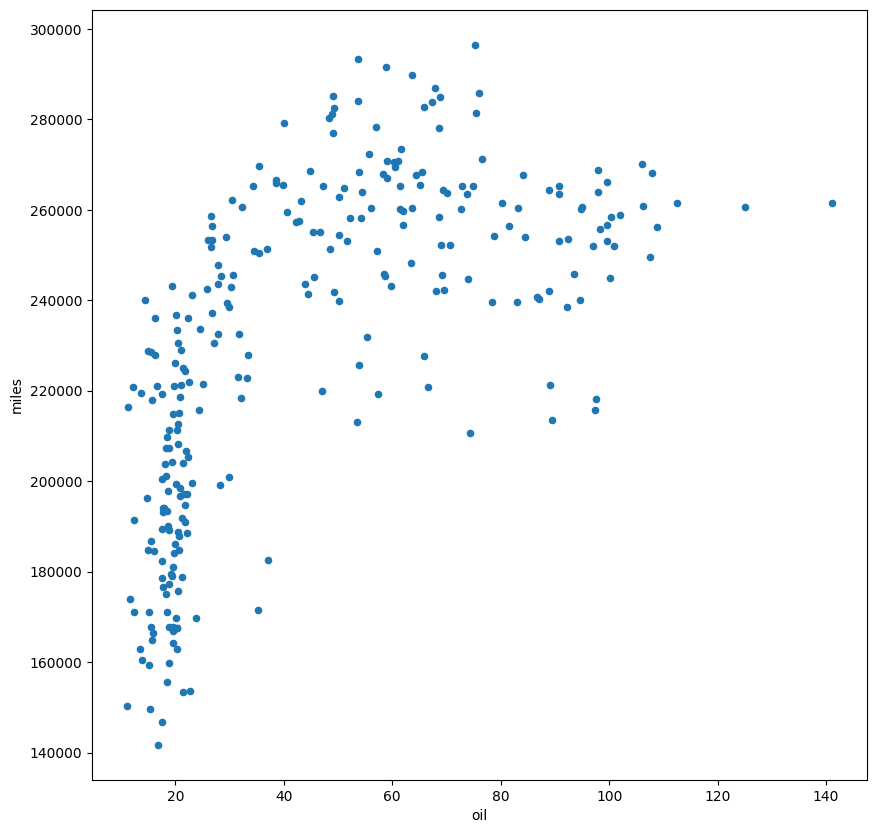

In [ ]:
df.plot(kind="scatter", x="oil", y="miles", figsize=(10, 10))

array([[<Axes: xlabel='oil', ylabel='oil'>,
        <Axes: xlabel='miles', ylabel='oil'>,
        <Axes: xlabel='icecream', ylabel='oil'>],
       [<Axes: xlabel='oil', ylabel='miles'>,
        <Axes: xlabel='miles', ylabel='miles'>,
        <Axes: xlabel='icecream', ylabel='miles'>],
       [<Axes: xlabel='oil', ylabel='icecream'>,
        <Axes: xlabel='miles', ylabel='icecream'>,
        <Axes: xlabel='icecream', ylabel='icecream'>]], dtype=object)

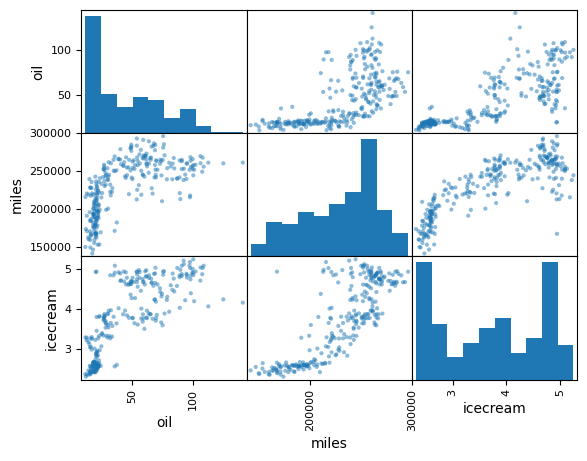

In [67]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[["oil", "miles", "icecream"]])

# Extension questions
1. Is the month correlated with any of these three values?
2. Create a scatter plot of `icecream` vs `miles`, adding the spectral colour map for the `month` value
3. Instead of an inner join, you could remove all rows of `df_oil` that werent' on the final day of the month. How could you do that?

In [68]:
# is the month correlated with any of these three values?
df.corr()

,oil,icecream,miles,month
oil,1.000000,0.777299,0.645250,0.006616
icecream,0.777299,1.000000,0.818402,-0.003981
miles,0.645250,0.818402,1.000000,0.079290
month,0.006616,-0.003981,0.079290,1.000000


<Axes: xlabel='icecream', ylabel='miles'>

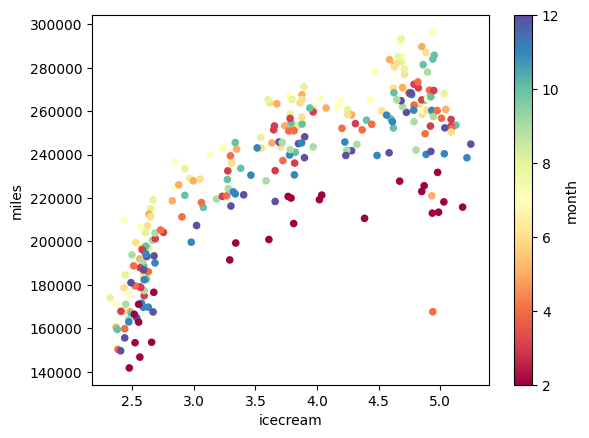

In [78]:
df.plot(kind="scatter", x="icecream", y="miles", c="month", colormap="Spectral")

In [75]:
# ignoring rows which are not from the end of the month
df_oil[df_oil.index.is_month_end]

,oil
date,
1986-01-31,18.95
1986-02-28,13.23
1986-03-31,10.25
1986-04-30,13.38
1986-06-30,12.80
...,...
2021-04-30,63.50
2021-06-30,73.52
2021-08-31,68.43
